In [1]:
import pandas as pd

In [2]:
# pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("car data.csv")

In [4]:
# pip list

Package             Version
------------------- -------------------
appnope             0.1.2
argon2-cffi         20.1.0
async-generator     1.10
attrs               21.2.0
backcall            0.2.0
bleach              3.3.0
certifi             2021.5.30
cffi                1.14.5
decorator           5.0.9
defusedxml          0.7.1
entrypoints         0.3
importlib-metadata  3.10.0
ipykernel           5.3.4
ipython             7.22.0
ipython-genutils    0.2.0
ipywidgets          7.6.3
jedi                0.17.0
Jinja2              3.0.0
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      6.1.12
jupyter-console     6.4.0
jupyter-core        4.7.1
jupyterlab-pygments 0.1.2
jupyterlab-widgets  1.0.0
MarkupSafe          2.0.1
mistune             0.8.4
nbclient            0.5.3
nbconvert           6.0.7
nbformat            5.1.3
nest-asyncio        1.5.1
notebook            6.4.0
numpy               1.20.3
packaging           20.9
pandas              1.2.4
pandocfilters 

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [7]:
# check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# create new column 'age'

In [12]:
df.drop('Car_Name', axis=1, inplace=True)

In [10]:
import datetime
now = datetime.datetime.now()
df['age'] = now.year - df['Year']
df.drop('Year', axis=1, inplace=True)

In [14]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print('number of numerical columns: ' , len(numerical_cols))

object_cols = [col for col in df.columns if df[col].dtype == "object"]
print('number of categorical columns: ' , len(object_cols))

number of numerical columns:  5
number of categorical columns:  3


In [15]:
for feature in object_cols:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Fuel_Type and number of categories are 3
The feature is Seller_Type and number of categories are 2
The feature is Transmission and number of categories are 2


# one hot encoder

In [17]:
# pip install scikit-learn

     |████████████████████████████████| 7.2 MB 8.5 MB/s eta 0:00:01     |███████████████████▊            | 4.4 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 30.7 MB 5.7 MB/s eta 0:00:01    |███▌                            | 3.4 MB 8.0 MB/s eta 0:00:04     |████████████████████▉           | 20.0 MB 4.2 MB/s eta 0:00:03     |█████████████████████████████▏  | 28.0 MB 5.7 MB/s eta 0:00:01
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.preprocessing import OneHotEncoder
fuel_OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
new_fuel_type = pd.DataFrame(fuel_OH_encoder.fit_transform(df[['Fuel_Type']]))
new_fuel_type.columns = fuel_OH_encoder.get_feature_names()

from sklearn.preprocessing import OneHotEncoder
seller_OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
new_seller_type = pd.DataFrame(seller_OH_encoder.fit_transform(df[['Seller_Type']]))
new_seller_type.columns = seller_OH_encoder.get_feature_names()

from sklearn.preprocessing import OneHotEncoder
transmission_OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
new_transmission = pd.DataFrame(transmission_OH_encoder.fit_transform(df[['Transmission']]))
new_transmission.columns = transmission_OH_encoder.get_feature_names()

In [20]:
df = pd.concat([df, new_seller_type, new_fuel_type, new_transmission], axis=1)

In [21]:
df.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

In [22]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,age,x0_Dealer,x0_Individual,x0_CNG,x0_Diesel,x0_Petrol,x0_Automatic,x0_Manual
0,3.35,5.59,27000,0,7,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,4.75,9.54,43000,0,8,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7.25,9.85,6900,0,4,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.85,4.15,5200,0,10,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4.60,6.87,42450,0,7,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
297,4.00,5.90,60000,0,6,1.0,0.0,0.0,0.0,1.0,0.0,1.0
298,3.35,11.00,87934,0,12,1.0,0.0,0.0,0.0,1.0,0.0,1.0
299,11.50,12.50,9000,0,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0


<AxesSubplot:>

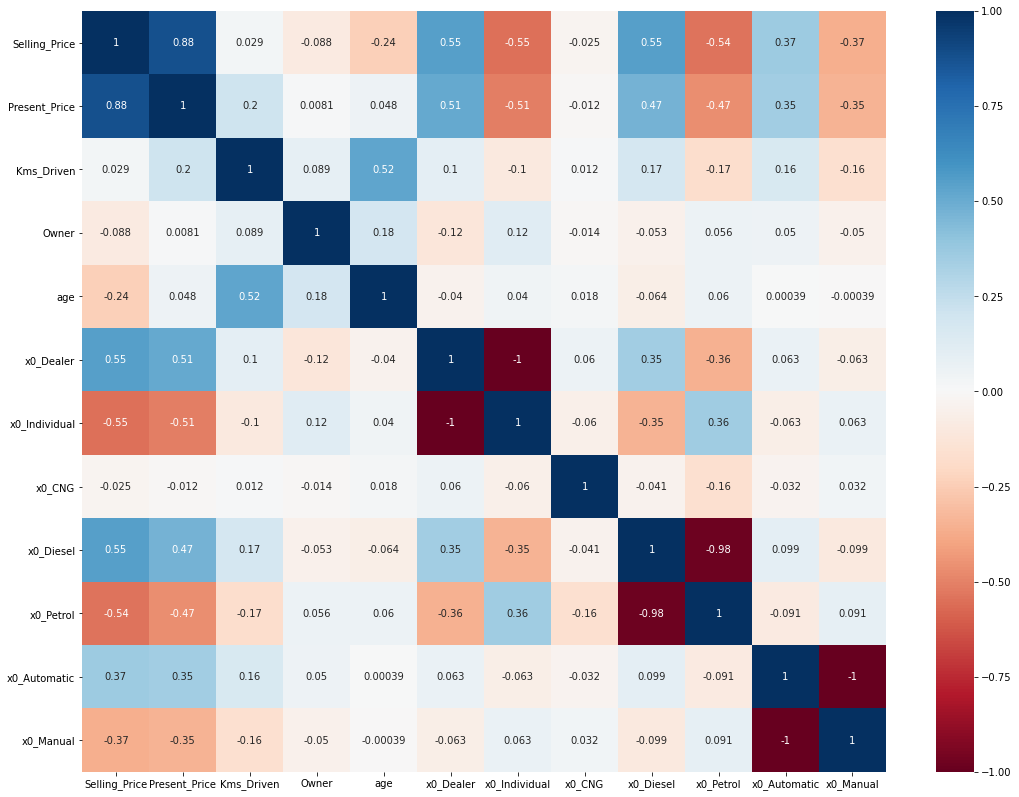

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)

In [25]:
# pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
     |████████████████████████████████| 7.2 MB 5.1 MB/s eta 0:00:01
  Using cached kiwisolver-1.3.1-cp37-cp37m-macosx_10_9_x86_64.whl (61 kB)
     |████████████████████████████████| 2.8 MB 18.5 MB/s eta 0:00:01     |███████████████████████████████▏| 2.8 MB 18.5 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


# train test split

In [30]:
#independent and dependent features
X, y = df.drop('Selling_Price', axis=1), df.Selling_Price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# feature importance

<AxesSubplot:>

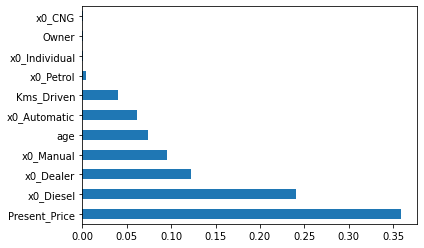

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor()
et_model.fit(X, y)
# et_model.feature_importances_ <- return array of scores
feat_importances = pd.Series(et_model.feature_importances_, index=X.columns)
feat_importances.nlargest(n=len(X.columns)).plot(kind='barh')

# creating model

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [33]:
import numpy as np
#num of trees
n_estimators = [int (x) for x in np.linspace(start=50, stop = 1000, num=5)]

#num of features to consider in every split
max_features = ['auto', 'sqrt']

#max num of levels in tree
max_depth = [int (x) for x in np.linspace(start=5, stop = 30, num=6)]

#min num of samples require to split a leaf node
min_samples_split = [2,5,10,15,100]

#min num of samples require in each leaf node
min_samples_leaf = [1,2,5,10]

In [35]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators' : n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth, 
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid, scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=-1)

In [36]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 287, 525, 762,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [38]:
rf_random.best_score_

-5.2513885905125

In [39]:
rf_best_model = rf_random.best_estimator_

In [40]:
y_pred = rf_best_model.predict(X_test)

/opt/anaconda3/envs/carprice/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

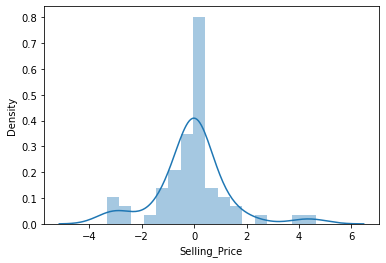

In [41]:
sns.distplot(y_test - y_pred)

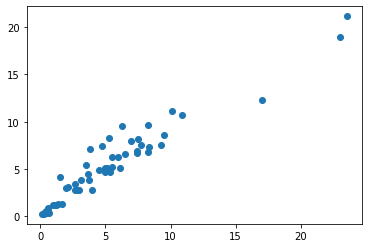

In [42]:
plt.scatter(y_test, y_pred)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
print("r2:" , r2_score(y_test, y_pred))
print("mse:" , mean_squared_error(y_test, y_pred))

r2: 0.9193273762335766
mse: 1.8583410432450211


In [44]:
import pickle
#open a file, where you want to store the data

file = open('random_forest_reg_carprice.pkl', 'wb')

#dump into to file
pickle.dump(rf_best_model, file)